<div class="alert alert-block alert-info">
    Import <b>Libraries</b>
</div>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
  

<div class="alert alert-block alert-info">
    1. <b>Data Gathering & Loading</b>
</div>

In [3]:
df = pd.read_csv('Salary Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,ID
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,2
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,3
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,4
4,52.0,Male,Master's,Director,20.0,200000.0,5
...,...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0,371
371,43.0,Male,Master's,Director of Operations,19.0,170000.0,372
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0,373
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0,374


<div class="alert alert-block alert-info">
    2. <b>Data Exploration</b>
</div>

In [4]:
df.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,ID
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,2
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,3
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,4
4,52.0,Male,Master's,Director,20.0,200000.0,5


In [5]:
df.tail(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,ID
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0,371
371,43.0,Male,Master's,Director of Operations,19.0,170000.0,372
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0,373
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0,374
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0,375


In [6]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'ID'],
      dtype='object')

In [7]:
df.count()

Age                    373
Gender                 373
Education Level        373
Job Title              373
Years of Experience    373
Salary                 373
ID                     375
dtype: int64

In [8]:
df.describe()

,Age,Years of Experience,Salary,ID
count,373.000000,373.000000,373.000000,375.000000
mean,37.431635,10.030831,100577.345845,188.000000
std,7.069073,6.557007,48240.013482,108.397417
min,23.000000,0.000000,350.000000,1.000000
25%,31.000000,4.000000,55000.000000,94.500000
50%,36.000000,9.000000,95000.000000,188.000000
75%,44.000000,15.000000,140000.000000,281.500000
max,53.000000,25.000000,250000.000000,375.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
 6   ID                   375 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 20.6+ KB


In [10]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 375
Number of columns: 7


In [11]:
df['Age'].unique()

array([32., 28., 45., 36., 52., 29., 42., 31., 26., 38., 48., 35., 40.,
       27., 44., 33., 39., 25., 51., 34., 47., 30., 41., 37., 24., 43.,
       50., 46., 49., 23., 53., nan])

In [12]:
df.nunique()

Age                     31
Gender                   2
Education Level          3
Job Title              174
Years of Experience     28
Salary                  36
ID                     375
dtype: int64

In [13]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
ID                     0
dtype: int64

<div class="alert alert-block alert-info">
    3. <b>Data Pre-Processing</b>
</div>

<div class="alert alert-block alert-warning">
    3.1. <b>Manage Null Values</b>
</div>

In [14]:
df = df.drop('ID', axis=1)

In [15]:
df['Salary'].mean(), df['Salary'].median(), df['Salary'].mode()


(np.float64(100577.34584450402),
 np.float64(95000.0),
 0    40000.0
 Name: Salary, dtype: float64)

In [16]:
def fillnaObjectMode(cols):
    for i in cols:
        df[i] = df[i].fillna(df[i].mode()[0])

columns = ['Gender', 'Education Level', 'Job Title']
fillnaObjectMode(columns)

In [17]:
def fillnaFloatMean(cols):
    for i in cols:
        df[i] = df[i].fillna(df[i].mean())

columns = ['Age', 'Years of Experience', 'Salary']
fillnaFloatMean(columns)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  375 non-null    float64
 1   Gender               375 non-null    object 
 2   Education Level      375 non-null    object 
 3   Job Title            375 non-null    object 
 4   Years of Experience  375 non-null    float64
 5   Salary               375 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [19]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

<div class="alert alert-block alert-warning">
    3.2. <b>Manage Data Types</b>
</div>

In [20]:
def changeFloatToInt(cols):
    for i in cols:
        df[i] = df[i].astype('int64')

columns = ['Age', 'Years of Experience', 'Salary']
changeFloatToInt(columns)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  375 non-null    int64 
 1   Gender               375 non-null    object
 2   Education Level      375 non-null    object
 3   Job Title            375 non-null    object
 4   Years of Experience  375 non-null    int64 
 5   Salary               375 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 17.7+ KB


In [22]:
def convertObjToInt(cols):
    for i in cols:
        data = pd.DataFrame({i:df[i].unique()})
        data_LE = LabelEncoder()
        data_LE.fit(np.ravel(data))    # data_LE.fit(data)
        df[i] = data_LE.transform(df[i])
        
columns = ['Gender', 'Education Level', 'Job Title']
convertObjToInt(columns)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  375 non-null    int64
 1   Gender               375 non-null    int64
 2   Education Level      375 non-null    int64
 3   Job Title            375 non-null    int64
 4   Years of Experience  375 non-null    int64
 5   Salary               375 non-null    int64
dtypes: int64(6)
memory usage: 17.7 KB


In [24]:
df.head(2)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,1,0,159,5,90000
1,28,0,1,17,3,65000


<div class="alert alert-block alert-warning">
    3.3. <b>Graphs</b>
</div>

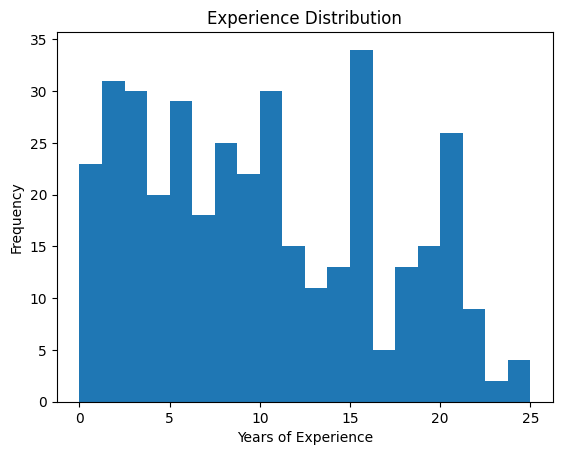

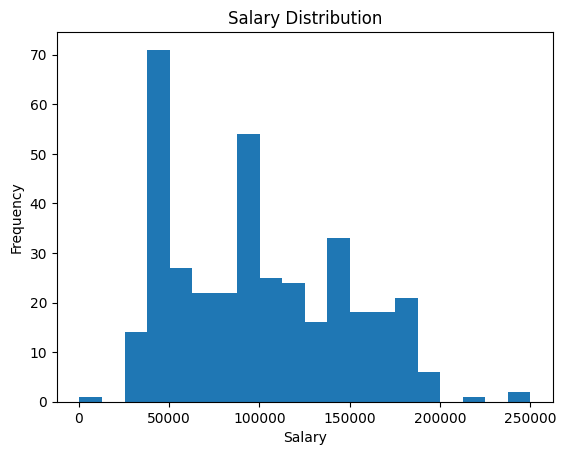

In [25]:
plt.figure()
plt.hist(df["Years of Experience"], bins=20)
plt.title("Experience Distribution")
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(df["Salary"], bins=20)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()


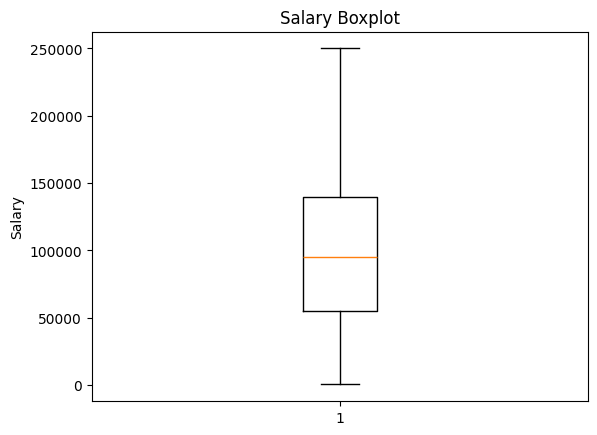

In [26]:
plt.figure()
plt.boxplot(df["Salary"])
plt.title("Salary Boxplot")
plt.ylabel("Salary")
plt.show()


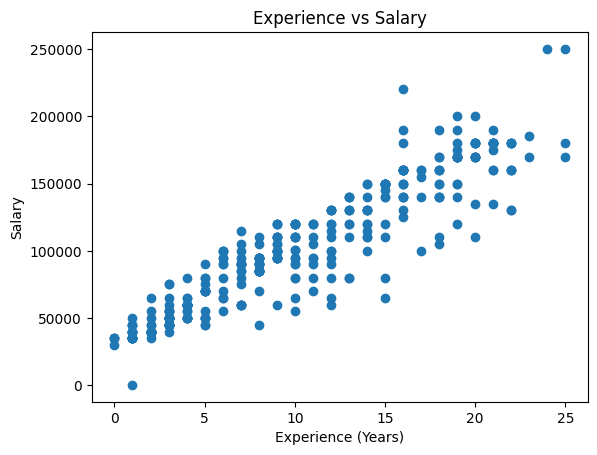

In [27]:
plt.figure()
plt.scatter(df["Years of Experience"], df["Salary"])
plt.title("Experience vs Salary")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.show()


In [28]:
df.to_csv('processed_data.csv', index=False, header=True)

In [29]:
df = pd.read_csv('processed_data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,1,0,159,5,90000
1,28,0,1,17,3,65000
2,45,1,2,130,15,150000
3,36,0,0,101,7,60000
4,52,1,1,22,20,200000
...,...,...,...,...,...,...
370,35,0,0,131,8,85000
371,43,1,1,30,19,170000
372,29,0,0,70,2,40000
373,34,1,0,137,7,90000


<div class="alert alert-block alert-info">
    4. <b>Train - Test Splitting</b>
</div>

In [30]:
import pandas as pd
df = pd.read_csv('processed_data.csv')
# df.info()
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [31]:
X = df.drop('Salary', axis=1)   # Dependant columns / Input columns
y = df['Salary']                # Resultant columns / Output column

In [32]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, shuffle=False) # 80:20, 70:30, 60:40

In [33]:
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(262, 5) (262,)
(113, 5) (113,)


<div class="alert alert-block alert-info">
    5. <b>Applying Classifier / Model Training</b>
</div>

<div class="alert alert-block alert-warning">
    5.1. <b>Random Forest Regressor Model</b>
</div>

In [34]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(train_X, train_y)
print("Random Forest Regressor model trained successfully.")


Random Forest Regressor model trained successfully.


In [35]:
model_pred_rf = model_rf.predict(test_X)
model_pred_rf


array([157700.        ,  46600.        , 116650.        ,  28868.375     ,
        86250.        , 127800.        ,  60826.19047619,  97700.        ,
       155200.        ,  52573.33333333,  92500.        , 175250.        ,
        43830.25      ,  98550.        , 155300.        ,  58960.        ,
        93800.        , 172800.        ,  47400.        ,  96600.        ,
       171350.        ,  34577.425     ,  99100.        , 145950.        ,
        53746.66666667,  85000.        , 129300.        ,  58100.        ,
        89055.77      , 175800.        ,  40150.        ,  87550.        ,
       135650.        ,  53646.66666667, 104300.        , 150900.        ,
        41150.        ,  97150.        , 177500.        ,  48450.        ,
       100050.        , 155200.        ,  58433.33333333,  89550.        ,
       178600.        ,  47400.        , 113100.        , 171350.        ,
        34577.425     ,  99100.        , 145950.        ,  53746.66666667,
        85000.        , 1

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(test_y, model_pred_rf)
mse = mean_squared_error(test_y, model_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, model_pred_rf)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 7724.170638432364
MSE: 133870885.80680542
RMSE: 11570.258675016968
R² Score: 0.9387803196769936


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
r2 = r2_score(test_y, model_pred_rf)
print("R² Score:", r2)

R² Score: 0.9387803196769936


<div class="alert alert-block alert-warning">
    5.2. <b>Model Saving & Loading</b>
</div>

In [40]:
import pickle
pickle.dump(model_rf, open('model_rf.pkl', 'wb')) # Model Saving

In [39]:
import pickle
model_rf = pickle.load(open('model_rf.pkl', 'rb'))  # Model Loading